In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [11]:
x = sp.Symbol("x")
iter_max = 100
tol = 1e-6
FUN = ""

In [12]:
#Calcular el error normal porcentual
def ERNP (valor_actual,valor_anterior):
    return (np.abs(valor_actual-valor_anterior) / np.abs(valor_actual)) * 100    

In [13]:
def graficar(funcion, x=None, y=None, c=False,strfun = ""):
    # Rango de valores en el eje x
    x_range = np.linspace(-3, 3, 400)

    # Calcula los valores de f(x) en el rango
    y_values = funcion(x_range)

    # Grafica f(x)
    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_values, label='f(x)', color='blue')

    if x != None and c:
        # Marca la raíz compleja encontrada en la gráfica
        plt.scatter([x.real], [x.imag], color='red', label='Raiz Compleja', marker='o', s=100)
    elif (x != None and y != None) and not c:
        plt.scatter(x, y, color='red', label='Raiz', marker='o', s=100)

    # Configura etiquetas y leyenda
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='red', linestyle="--", linewidth=0.9)
    plt.axvline(0, color='green', linestyle="-.", linewidth=0.9)
    plt.legend()

    # Muestra la gráfica
    plt.title('f(x)={}'.format(strfun))    
    plt.grid(True)    
    plt.show()

In [14]:
def ingresar_polinomio():
    entrada = input("Ingrese un polinomio en términos de 'x': ") 
    #almacenar el str de la función ingresada
    fun = entrada
    #Se convierte la cadena de entrada en un funcion evaluable por python
    funcion = sp.lambdify(x,entrada,'numpy')
    #Se convierte la cadena de la derivada en un funcion evaluable por python
    derivada = sp.lambdify(x,sp.diff(f=entrada,symbols=x),'numpy')    
    return funcion, derivada,fun


In [15]:
def ingresar_valor_inicial():
    complejo = input("¿El valor inicial de x es complejo? (S/N): ")
    #Si la x inicial es un número complejo se indica y se almacena en x0
    if complejo.lower() == 's':
        x0_real = float(input("Ingrese la parte real de x0: "))
        x0_imag = float(input("Ingrese la parte imaginaria de x0: "))
        x0 = complex(x0_real, x0_imag)
    else:
        x0 = float(input("Ingrese el valor de x0 inicial: "))
    return x0

Raiz para el polinomio: -0.638641789907933


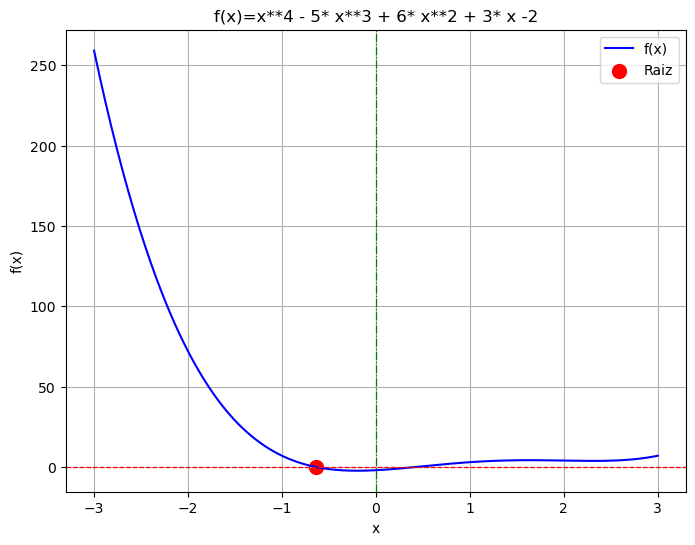

In [16]:
def encontrar_raices():
    funcion, derivada,strfun = ingresar_polinomio()
    x0 = ingresar_valor_inicial()
    
    i = 0
    x1 = 0            
    
    #Ciclo while para controlar que el metodo Newton-Raphson no se cicle infinito
    while i < iter_max:
        #Si la derivada evaluada en el valor actual de x da 0 se detiene el programa para evitar errores
        if derivada( x0) == 0:
            print("La derivada es igual a cero en x0, el método de Newton-Raphson no puede continuar.")
            break

        x1 = x0 - funcion(x0) / derivada(x0)

        #Si el nuevo valor x1 es 0 se detiene el programa para evitar errores de división por 0 al calcular ERNP
        if x1 == 0:
            print("El valor de x1 es 0, el método de Newton-Raphson no puede continuar.")
            break

        #Si el ERNP es menor que el valor de tolerancia entonces es una raíz
        if ERNP(x1, x0) < complex(tol, 0):
            print("Raiz para el polinomio:", x1)            
            graficar(funcion, x=x1,y=funcion(x1),strfun=strfun)
            break

        x0 = x1
        i += 1
        
encontrar_raices()

Raiz para el polinomio: (0.4236751612302069+5.551609756452574e-22j)


/home/legokna/anaconda3/envs/math38/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


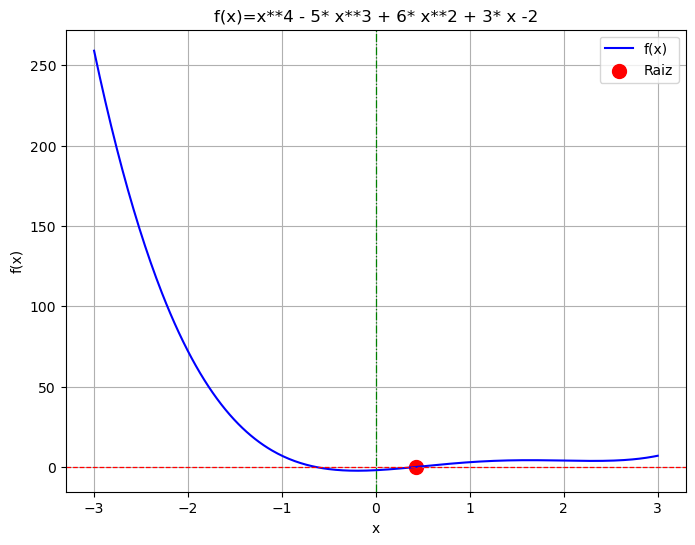

In [17]:
encontrar_raices()

In [ ]:
#(-1.2383497344421214e-13+1.2154234324719682e-13j)
#xv = (-1.2383497344421214e-13+1.2154234324719682e-13j)
#derivada(xv)

#xs1 = xv - funcion(xv) / derivada (xv)
#print (xs1)
#print (ERNP(valor_actual=xs1,valor_anterior=xv))

* que pasa si x1 es igual a cero
* que pasa si la derivada es igual a cero
* como se encuentran las raices complejas
* el programa es para encontrar todas las raices icluidas complejas o solo con que encuentre una raiz